# Final project ----Ziyang Guo

## 1. Introduction

This project aims to uncover the factors that lead to employee attrition and explore important questions. Attrition is a problem that impacts all businesses, irrespective of geography, industry, and size of the company. Employee attrition leads to significant costs for a business, including the cost of business disruption, hiring new staff, and training new staff.[1] I will use the IBM dataset to show the ranking of factors' lead to attrition. As we all know that the employee attrition led by various factors such as 'Distance From Home', 'EnvironmentSatisfaction', 'job satisfaction'... and so on. This project aims to dig the difference of weight between factors to factors. The reference link is a machine learning prediction on this dataset. I think this dataset source is very useful. So I decide to use this dataset to finish my final project's research.

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import urllib.request
import kaggle

In [37]:
file1 = r'C:\Users\guozi\Documents\GitHub\AIM-5001\Final project Data/train.csv'
data1 = pd.read_csv(file1)
data1

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053,57,0,Travel_Rarely,405,Research & Development,1,2,Life Sciences,1,1483,...,1,80,1,13,2,2,12,9,2,8
1054,49,0,Travel_Rarely,1490,Research & Development,7,4,Life Sciences,1,1484,...,2,80,2,29,3,3,8,7,0,7
1055,34,0,Travel_Frequently,829,Research & Development,15,3,Medical,1,1485,...,4,80,2,16,3,2,14,8,6,9
1056,28,1,Travel_Frequently,1496,Sales,1,3,Technical Degree,1,1486,...,4,80,1,5,3,4,3,2,1,2


## 2. Data summary
For ...  
**Note**:  
Education  
1 'Below College'  
2 'College'  
3 'Bachelor'  
4 'Master'  
5 'Doctor'  
EnvironmentSatisfaction  
1 'Low'  
2 'Medium'  
3 'High'  
4 'Very High'  
JobInvolvement  
1 'Low'  
2 'Medium'  
3 'High'  
4 'Very High'  
JobSatisfaction  
1 'Low'  
2 'Medium'  
3 'High'  
4 'Very High'  
PerformanceRating  
1 'Low'  
2 'Good'  
3 'Excellent'  
4 'Outstanding'  
RelationshipSatisfaction  
1 'Low'  
2 'Medium'  
3 'High'  
4 'Very High'  
WorkLifeBalance  
1 'Bad'  
2 'Good'  
3 'Better'  
4 'Best'  

## 3. Exploratory Data Analysis

In [31]:
data1['BusinessTravel'].drop_duplicates()

0         Travel_Rarely
1     Travel_Frequently
17           Non-Travel
Name: BusinessTravel, dtype: object

count      3.000000
mean     352.666667
std      344.142897
min      107.000000
25%      156.000000
50%      205.000000
75%      475.500000
max      746.000000
dtype: float64

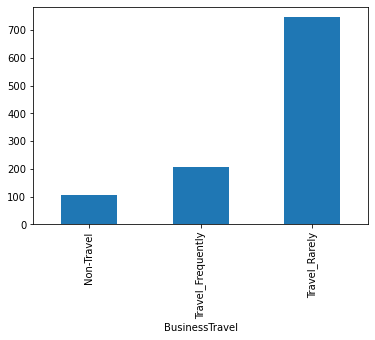

In [36]:
e1 = data1.groupby('BusinessTravel').size()
e1.plot.bar()
e1.describe()

,DailyRate
count,179.000000
mean,762.502793
std,406.848319
min,103.000000
25%,422.500000
50%,699.000000
75%,1099.500000
max,1496.000000


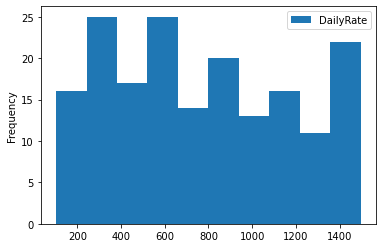

In [51]:
e2 = data1[['DailyRate']][(data1['Attrition']) == 1]
e2.groupby('DailyRate').size()
e2.plot.hist()
e2.describe()

,DailyRate
count,879.000000
mean,819.121729
std,408.375757
min,102.000000
25%,471.500000
50%,829.000000
75%,1180.000000
max,1499.000000


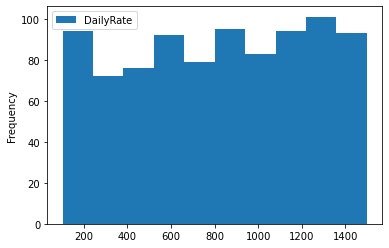

In [52]:
e3 = data1[['DailyRate']][(data1['Attrition']) == 0]
e3.groupby('DailyRate').size()
e3.plot.hist()
e3.describe()

,Age
count,179.000000
mean,33.469274
std,9.834753
min,18.000000
25%,26.000000
50%,31.000000
75%,39.000000
max,58.000000


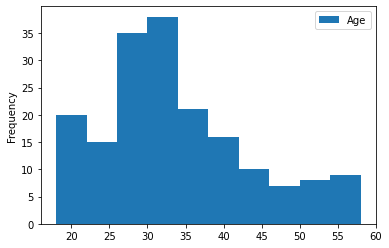

In [64]:
e41 = data1[['Age']][(data1['Attrition']) == 1]
e42 = data1[['Age']][(data1['Attrition']) == 0]
e41.groupby('Age').size()
e41.plot.hist()
e41.describe()

,Age
count,879.000000
mean,37.786121
std,9.156684
min,18.000000
25%,31.000000
50%,36.000000
75%,44.000000
max,60.000000


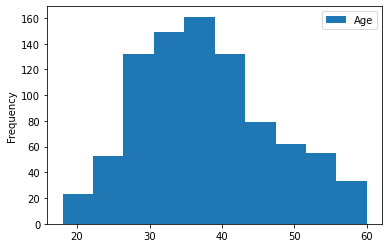

In [65]:
e42.groupby('Age').size()
e42.plot.hist()
e42.describe()

Department
Human Resources            38
Research & Development    701
Sales                     319
dtype: int64

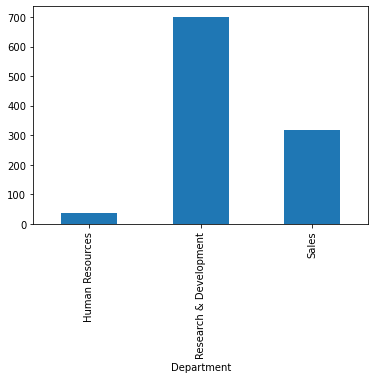

In [74]:
e5 = data1.groupby('Department').size()
e5.plot.bar()
e5.describe()

,Department
count,179
unique,3
top,Research & Development
freq,107


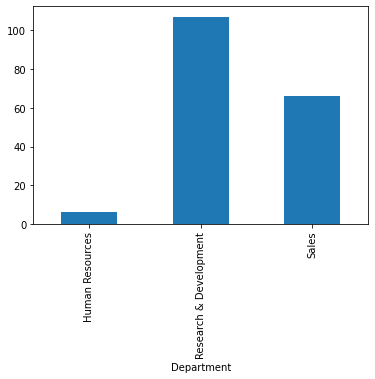

In [77]:
e52 = data1[['Department']][(data1['Attrition']) == 1]
e52.groupby('Department').size().plot.bar()
e52.describe()